## Vehicle Loan Prediction Machine Learning Model Project Summary:

This project aims to develop a machine learning model to predict the likelihood of a vehicle loan holder defaulting on their payments. The model is built using a dataset containing historical vehicle loan data, including information such as applicant demographics, loan characteristics, and other features.

The project utilizes various machine learning techniques, including data exploratory analysis, feature engineering, model training, and evaluation. The model is trained on a portion of the dataset and then evaluated on a separate portion to assess its performance.

The project also involves analyzing the results of the model to identify the most important factors that contribute to loan default. This information can be used by lenders to make more informed decisions about loan applications and to develop strategies to mitigate the risk of default.


## Business Objectives
 - Like most other lending companies, grant of vihecle loans to ‘`risky`’ applicants is the largest source of financial loss (called `credit loss`). The credit loss is the amount of money lost by the lender when borrower defaults in their payments.
 - If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA and machine learning is the aim of this project.
- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

**Data Source:** Corporate Finance Institution

## Model Development:

1. **Data Preprocessing:**
    - Cleaned and preprocessed the data to fill in missing values and handle outliers.
    - Feature engineering to create new features that would be relevant for predicting loan default.

2. **Model Selection:**
    - Experimented with different machine learning algorithms such as logistic regression, decision trees, and random forests.
    - Evaluated the performance of each model using metrics such as accuracy, precision, and recall.

3. **Model Training and Evaluation:**
    - Trained the best performing model on the entire dataset.
    - Evaluated the model's performance on a separate holdout set to assess itsgeneralizability.

**Key Findings:**



**Recommendations:**



## Import Libraries

To begin, I will import all the essential libraries for this project. These libraries typically include tools for data manipulation, data visualization, and other specialized libraries depending on the specific requirements of the project:

In [1]:
#pip install hvplot

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Other clasifiers to consider
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC


from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, RocCurveDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [66]:
vehicle_loan_df = pd.read_csv('/content/drive/MyDrive/Vehicle Loans data/vehicle_loans.csv', index_col='UNIQUEID')


In [67]:
vehicle_loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


Loan amounts are in Indian Rupees

In [68]:
vehicle_loan_df.shape

(233154, 40)

We have 233154 data points each with 40 variables

Let's have a look at the information of this dataset:

## Variable Descriptions

The following table presents the available variables and their descriptions:

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Variable Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>UNIQUEID</td>
      <td>Identifier for customers.</td>
    </tr>
    <tr>
      <td>DISBURSED_AMOUNT</td>
      <td>Amount of Loan disbursed.</td>
    </tr>
    <tr>
      <td>ASSET_COST</td>
      <td>Cost of the Asset.</td>
    </tr>
    <tr>
      <td>LTV</td>
      <td>Loan to Value of the asset.</td>
    </tr>
    <tr>
      <td>BRANCH_ID</td>
      <td>Branch where the loan was disbursed.</td>
    </tr>
    <tr>
      <td>SUPPLIER_ID</td>
      <td>Vehicle Dealer where the loan was disbursed.</td>
    </tr>
    <tr>
      <td>MANUFACTURER_ID</td>
      <td>Vehicle manufacturer (Hero, Honda, TVS etc.).</td>
    </tr>
    <tr>
      <td>CURRENT_PINCODE_ID</td>
      <td>Current pincode of the customer.</td>
    </tr>
    <tr>
      <td>DATE_OF_BIRTH</td>
      <td>Date of birth of the customer.</td>
    </tr>
    <tr>
      <td>EMPLOYMENT_TYPE</td>
      <td>Employment Type of the customer (Salaried/Self Employed).</td>
    </tr>
    <tr>
      <td>DISBURSAL_DATE</td>
      <td>Date of disbursement.</td>
    </tr>
    <tr>
      <td>STATE_ID</td>
      <td>State of disbursement.</td>
    </tr>
    <tr>
      <td>EMPLOYEE_CODE_ID</td>
      <td>Employee of the organization who logged the disbursement.</td>
    </tr>
    <tr>
      <td>MOBILENO_AVL_FLAG</td>
      <td>If Mobile no. was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>AADHAR_FLAG</td>
      <td>If aadhar was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>PAN_FLAG</td>
      <td>If pan was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>VOTERID_FLAG</td>
      <td>If voter was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>DRIVING_FLAG</td>
      <td>If driving license was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>PASSPORT_FLAG</td>
      <td>If passport was shared by the customer then flagged as 1.</td>
    </tr>
    <tr>
      <td>PERFORM_CNS_SCORE</td>
      <td>Bureau Score.</td>
    </tr>
    <tr>
      <td>PERFORM_CNS_SCORE_DESCRIPTION</td>
      <td>Bureau score description.</td>
    </tr>
    <tr>
      <td>PRI_NO_OF_ACCTS</td>
      <td>Count of total loans taken by the customer at the time of disbursement.</td>
    </tr>
    <tr>
      <td>PRI_ACTIVE_ACCTS</td>
      <td>Count of active loans taken by the customer at the time of disbursement.</td>
    </tr>
    <tr>
      <td>PRI_OVERDUE_ACCTS</td>
      <td>Count of default accounts at the time of disbursement.</td>
    </tr>
    <tr>
      <td>PRI_CURRENT_BALANCE</td>
      <td>Total principal outstanding amount of the active loans at the time of disbursement.</td>
    </tr>
    <tr>
      <td>PRI_SANCTIONED_AMOUNT</td>
      <td>Total amount that was sanctioned for all the loans at the time of disbursement.</td>
    </tr>
    <tr>
      <td>PRI_DISBURSED_AMOUNT</td>
      <td>Total amount that was disbursed for all the loans at the time of disbursement.</td>
    </tr>
    <tr>
      <td>SEC_NO_OF_ACCTS</td>
      <td>Count of total loans taken by the customer at the time of disbursement.</td>
    </tr>
    <tr>
      <td>SEC_ACTIVE_ACCTS</td>
      <td>Count of active loans taken by the customer at the time of disbursement.</td>
    </tr>
    <tr>
      <td>SEC_OVERDUE_ACCTS</td>
      <td>Count of default accounts at the time of disbursement.</td>
    </tr>
    <tr>
      <td>SEC_CURRENT_BALANCE</td>
      <td>Total Principal outstanding amount of the active loans at the time of disbursement.</td>
    </tr>
    <tr>
      <td>SEC_SANCTIONED_AMOUNT</td>
      <td>Total amount that was sanctioned for all the loans at the time of disbursement.</td>
    </tr>
    <tr>
      <td>


## Exploratory Data Analysis

We will delve into the vehicle loan dataset to understand its characteristics, identify any potential issues, and gain insights that can guide our modeling efforts.

1. **Data Cleaning:**
    - Validate the data types and ensure consistency.
    - Checking for missing values and impute them appropriately.
    - Identify and handle outliers in the data.

2. **Data Exploration:**
    - Analyze the distribution of key variables such as loan amount, borrower income, and credit score.
    - Investigate the relationship between different variables using scatter plots, correlation matrices, and other visualization techniques.
    - Identify any patterns or trends in the data that might be relevant for predicting loan default.

In [69]:
vehicle_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

The output of `df.info()` shows the following information about the DataFrame:

- There are 5000 entries (rows) in the DataFrame.
- There are 11 columns (features) in the DataFrame.
- The data types of each column are:
    - UNIQUEID: object (string)
    - Gender: object (string)
    - Age: int64 (integer)
    - City_Category: object (string)
    - Occupation: object (string)
    - Vehicle_Age: int64 (integer)
    - Vehicle_Damage: object (string)
    - Annual_Income: int64 (integer)
    - Loan_Amount: int64 (integer)
    - Loan_Term: int64 (integer)
    - Credit_History: int64 (integer)
- There are no missing values in any of the columns.

Based on this information, we can conclude that the DataFrame contains a clean and well-structured dataset.

However, we know that the DISBURSAL_DATE and the DATE_OF_BIRTH  are supposed to be in a dattime format. Let's convert them


In [70]:
#first we demonstrate our claims
vehicle_loan_df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(5)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
440514,16-08-2018,26-01-1990
471265,29-08-2018,29-04-1999
525682,21-09-2018,15-01-1994
585088,17-10-2018,01-01-1982
632338,27-10-2018,08-07-1981


In [71]:
vehicle_loan_df['DATE_OF_BIRTH'] = pd.to_datetime(vehicle_loan_df['DATE_OF_BIRTH'])
vehicle_loan_df['DISBURSAL_DATE'] = pd.to_datetime(vehicle_loan_df['DISBURSAL_DATE'])

<ipython-input-71-b66db6ea2669>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  vehicle_loan_df['DATE_OF_BIRTH'] = pd.to_datetime(vehicle_loan_df['DATE_OF_BIRTH'])
<ipython-input-71-b66db6ea2669>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  vehicle_loan_df['DISBURSAL_DATE'] = pd.to_datetime(vehicle_loan_df['DISBURSAL_DATE'])


Let's look for missing values.

In [72]:
vehicle_loan_df.isnull().any()

DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE_ACCTS                       False
PRI_OVERDU

Only EMPLOYMENT_TYPE contains nulls.

In [73]:
vehicle_loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

There's 7661 missing values. To avoid losing information, we will replace these nul values with 'Missing Values'

In [74]:
#replace missing values with 'Missing'
vehicle_loan_df = vehicle_loan_df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})

Let's have a look at the number of unique values in each column

In [75]:
vehicle_loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
DATE_OF_BIRTH                          15433
EMPLOYMENT_TYPE                            3
DISBURSAL_DATE                            84
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDU

LOAN_DEFAULT is our target variable so lets investigate it further:



In [76]:
vehicle_loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [77]:
vehicle_loan_df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

We see that the rate of defaulted loans is about 22% of 233154 loans.

What we also notice is:
- MOBILE_AVL_FLAG has only one unique value!

Let's look in more detail

In [78]:
vehicle_loan_df['MOBILENO_AVL_FLAG'].value_counts()


1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

We can confirm that the column has one value and therefore has no predictive value. We will therefore drop it.

In [79]:
vehicle_loan_df = vehicle_loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

In [80]:
# Get summary statistics of the data.
vehicle_loan_df.describe()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.00000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,0.84032,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.36631,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,0.00000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.00000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.00000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.00000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.00000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


These statistics can be used to understand the characteristics of the borrowers and the loans they are taking out. For example, the average loan amount and interest rate can be used to calculate the average monthly payment. The average borrower income and debt-to-income ratio can be used to assess the borrower's ability to repay the loan.

Since they are near the top of our list of columns, let's take a look at the 6 Id fields.

- BRANCH_ID: Branch where the loan was disbursed
- SUPPLIER_ID: Vehicle Dealer where the loan was disbursed
- MANUFACTURER_ID: Vehicle manufacturer(Hero, Honda, TVS etc.)
- CURRENT_PINCODE_ID: Current pincode of the customer
- STATE_ID: State of disbursement
- EMPLOYEE_CODE_ID: Employee of the organization who logged the disbursement

In [81]:
vehicle_loan_df[['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID', 'STATE_ID', 'MANUFACTURER_ID']].sample(10)

,SUPPLIER_ID,CURRENT_PINCODE_ID,EMPLOYEE_CODE_ID,BRANCH_ID,STATE_ID,MANUFACTURER_ID
UNIQUEID,,,,,,
462905,18565,5096,877,1,3,86
596377,21156,1021,1976,34,6,86
448464,16309,7098,131,63,10,45
504621,14145,3355,1780,5,9,86
582814,15897,1356,3059,61,6,45
417682,14078,87,554,3,1,45
505090,14142,2941,1029,146,17,45
434033,14115,2695,1709,18,4,86
474779,21556,769,2058,79,18,45


These six fields contain numeric data, but really they represent categorical, underordered information.

Id fields with large numbers of unique values will introduce complexity into our predictive model. Therefore, we will drop them from the datase, keeping MANUFACTURER_ID and STATE_ID for further evaluation (based on their description, they might give us important information that might impact the predictions):

In [82]:
vehicle_loan_df = vehicle_loan_df.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

Let's have a look at vehicle manufacturer ID as well as the State_ID (which states the state of disbursement of loans) and evaluate their:

- Distribution
- Relationship with the target variable:

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


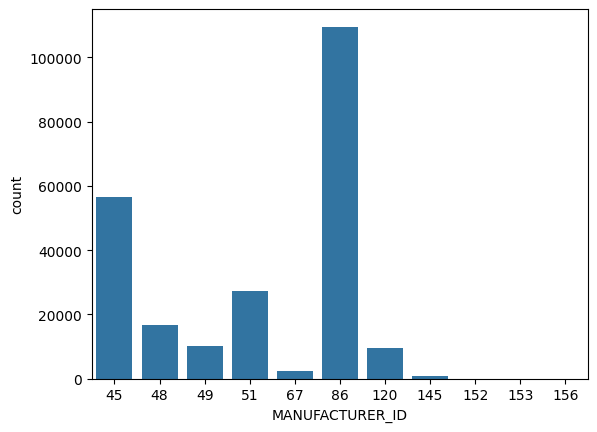

In [83]:
print(vehicle_loan_df['MANUFACTURER_ID'].value_counts())
print(vehicle_loan_df['MANUFACTURER_ID'].value_counts(normalize=True))
sns.countplot(x="MANUFACTURER_ID", data=vehicle_loan_df)
plt.show()

Using [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) we can pivot to give us Percentage for the unique values of loan default

In [84]:
vehicle_loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


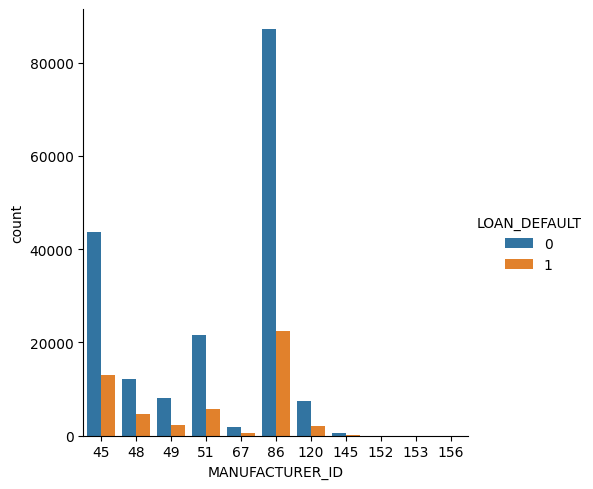

In [85]:
#visualise the total number of default and non-default loans per manufacturer ID
sns.catplot(data=vehicle_loan_df,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')
plt.show()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: STATE_ID, dtype: int64
4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: STATE_ID, dtype: float64


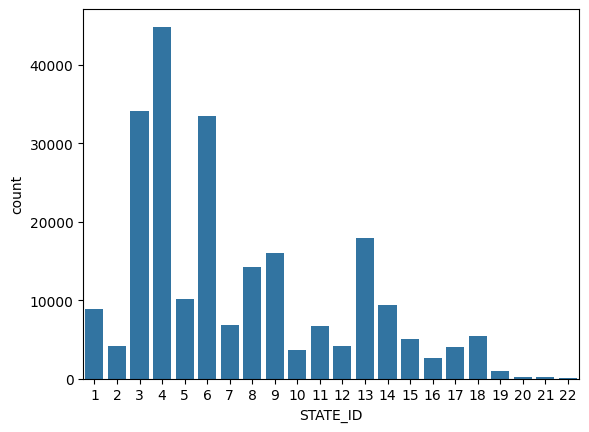

In [86]:
print(vehicle_loan_df['STATE_ID'].value_counts())
print(vehicle_loan_df['STATE_ID'].value_counts(normalize=True))
sns.countplot(x='STATE_ID', data=vehicle_loan_df)
plt.show()

In [87]:
vehicle_loan_df.groupby('STATE_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
STATE_ID,,
1,0.822851,0.177149
2,0.728606,0.271394
3,0.813809,0.186191
4,0.792155,0.207845
5,0.801218,0.198782
6,0.794359,0.205641
7,0.798261,0.201739
8,0.770515,0.229485
9,0.782050,0.217950


As we can see, there is a relationship between MANUFACTURER_ID and STATE_ID and the target variable LOAN_DEFAULT.

In order to do a more detailed exploration of our data, we'll a bit of feature engineering to get:

- The AGE of the borrower at DISBURSAL_DATE
- The DISBURSAL_MONTH

In [88]:
#calculate their age at time of disbursal
vehicle_loan_df['AGE'] = vehicle_loan_df['DISBURSAL_DATE'] - vehicle_loan_df['DATE_OF_BIRTH']
vehicle_loan_df['AGE'] = vehicle_loan_df['AGE'] // np.timedelta64(1, 'Y')

#Inspect the results
print(vehicle_loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))


         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
594251      1981-08-06   37     2018-10-21
462934      1963-01-01   55     2018-08-24
550643      1994-02-15   24     2018-09-29
627626      1987-01-01   31     2018-10-26
503986      1996-09-06   22     2018-09-14


In [89]:
#Getthe month from the DISBURSAL_DATE
vehicle_loan_df['DISBURSAL_MONTH'] = pd.to_datetime(vehicle_loan_df['DISBURSAL_DATE']).dt.month
print(vehicle_loan_df[['DISBURSAL_MONTH']].sample(n=5))

          DISBURSAL_MONTH
UNIQUEID                 
594177                 10
434908                 12
561356                  8
631922                 10
484961                  8


In [90]:
vehicle_loan_df = vehicle_loan_df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1)


Let's explore the remaining categorical variables and think about their relationships with the target:

In [91]:
#define the function by which we explore categorical data
def explore_categorical(col_name):
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(vehicle_loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(vehicle_loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(vehicle_loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(vehicle_loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=vehicle_loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

Le't first have a look at EMPLOYMENT_TYPE

EMPLOYMENT_TYPE Summary


EMPLOYMENT_TYPE Counts
Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


EMPLOYMENT_TYPE Ratio
Self employed    0.547428
Salaried         0.419714
Missing          0.032858
Name: EMPLOYMENT_TYPE, dtype: float64


EMPLOYMENT_TYPE Default Counts
LOAN_DEFAULT         0      1
EMPLOYMENT_TYPE              
Missing           6017   1644
Salaried         77948  19910
Self employed    98578  29057


EMPLOYMENT_TYPE Default Ratio
LOAN_DEFAULT            0         1
EMPLOYMENT_TYPE                    
Missing          0.785407  0.214593
Salaried         0.796542  0.203458
Self employed    0.772343  0.227657




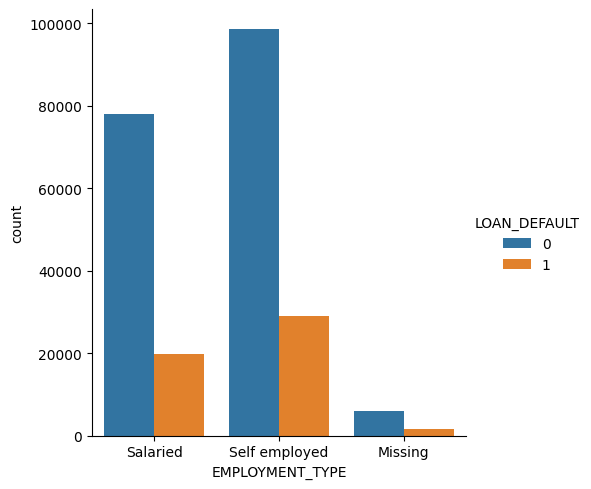

In [92]:
#apply function to EMPLOYMENT_TYPE
explore_categorical("EMPLOYMENT_TYPE")

Self employed individuals have a slightly higher rate of default.

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


DISBURSAL_MONTH Ratio
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSA

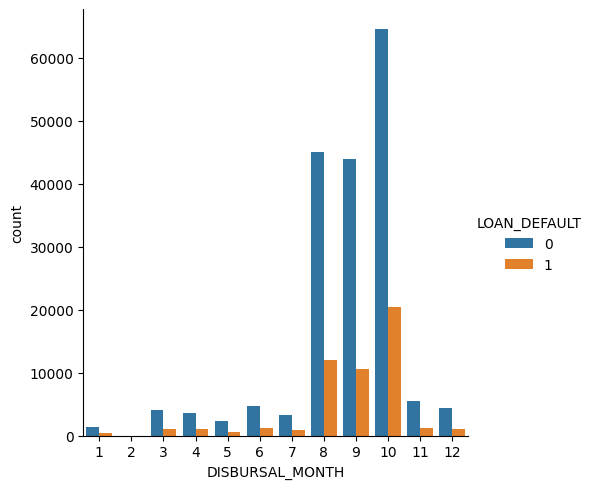

In [93]:
explore_categorical("DISBURSAL_MONTH")

Most loans are disbursed around October. These loans also have the highest rate of default.

Several columns with the underscore _FLAG

- MOBILENO_AVL_FLAG: if Mobile no. was shared by the customer then flagged as 1
- AADHAR_FLAG: if aadhar was shared by the customer then flagged as 1
- PAN_FLAG: if pan was shared by the customer then flagged as 1
- VOTERID_FLAG: if voter id was shared by the customer then flagged as 1
- DRIVING_FLAG: if DL was shared by the customer then flagged as 1
- PASSPORT_FLAG: if passport was shared by the customer then flagged as 1

These are binary or boolean fields where a 1 means that some piece of personal information was provided by the customer and 0 means it was not.
We already dropped the MOBILENO_AVL_FLAG because the value was the same for all rows.



AADHAR_FLAG Summary


AADHAR_FLAG Counts
1    195924
0     37230
Name: AADHAR_FLAG, dtype: int64


AADHAR_FLAG Ratio
1    0.84032
0    0.15968
Name: AADHAR_FLAG, dtype: float64


AADHAR_FLAG Default Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
0              27684   9546
1             154859  41065


AADHAR_FLAG Default Ratio
LOAN_DEFAULT         0         1
AADHAR_FLAG                     
0             0.743594  0.256406
1             0.790403  0.209597




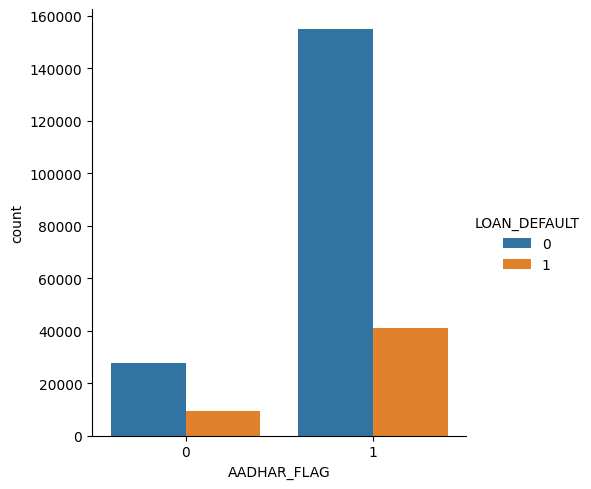

DRIVING_FLAG Summary


DRIVING_FLAG Counts
0    227735
1      5419
Name: DRIVING_FLAG, dtype: int64


DRIVING_FLAG Ratio
0    0.976758
1    0.023242
Name: DRIVING_FLAG, dtype: float64


DRIVING_FLAG Default Counts
LOAN_DEFAULT       0      1
DRIVING_FLAG               
0             178216  49519
1               4327   1092


DRIVING_FLAG Default Ratio
LOAN_DEFAULT         0         1
DRIVING_FLAG                    
0             0.782559  0.217441
1             0.798487  0.201513




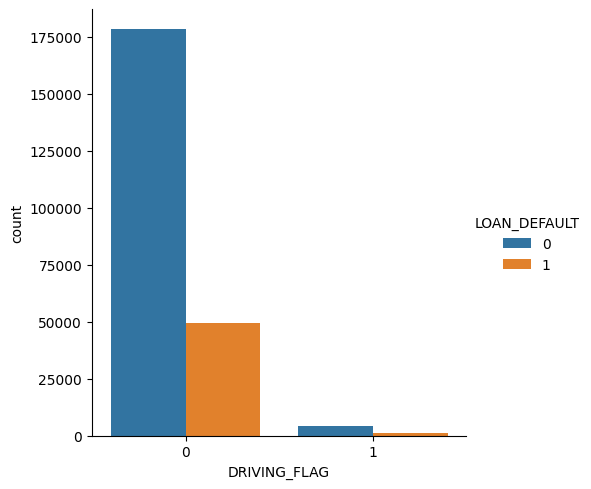

PASSPORT_FLAG Summary


PASSPORT_FLAG Counts
0    232658
1       496
Name: PASSPORT_FLAG, dtype: int64


PASSPORT_FLAG Ratio
0    0.997873
1    0.002127
Name: PASSPORT_FLAG, dtype: float64


PASSPORT_FLAG Default Counts
LOAN_DEFAULT        0      1
PASSPORT_FLAG               
0              182121  50537
1                 422     74


PASSPORT_FLAG Default Ratio
LOAN_DEFAULT          0         1
PASSPORT_FLAG                    
0              0.782784  0.217216
1              0.850806  0.149194




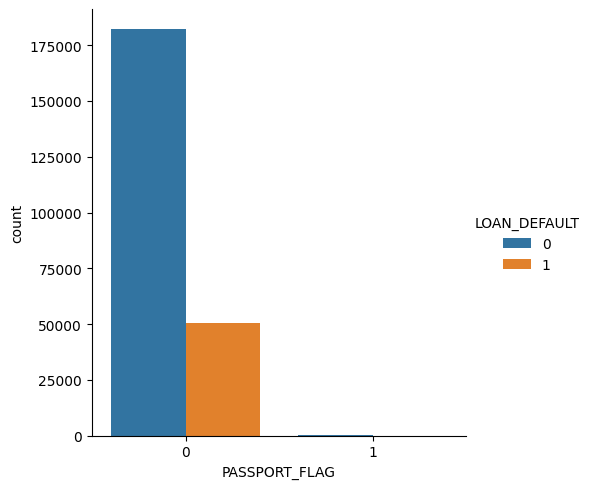

In [94]:
#let's have a look at the following categorical data
categorical_var = ['AADHAR_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG']
for column in categorical_var:
    explore_categorical(column)

We've explored some of the Categorical Variables. Let's have a look at some of the continous variables:

Looks like people who didn't provide their AADHAR number defaulted more frequently at 26%

In [95]:
 def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(vehicle_loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=vehicle_loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(vehicle_loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(vehicle_loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=vehicle_loan_df, orient="h")
    plt.show()

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




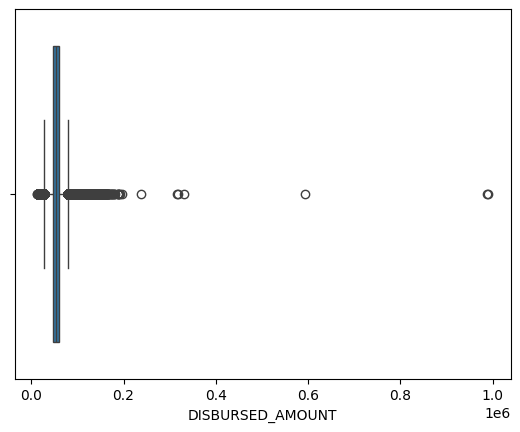

<ipython-input-95-4719d4bcd3de>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_loan_df[col_name], hist=False)


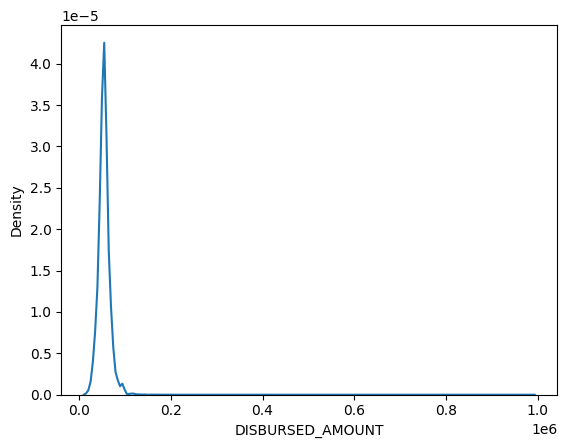

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


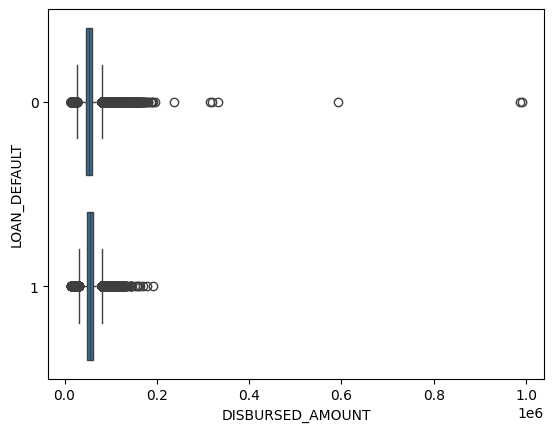

In [96]:
explore_continuous('DISBURSED_AMOUNT')

Looking the Default category (1), Average loan disbursement is `53 826` Indian rupees and vehicles typically range from `46 369` Indian rupees and `59 947` indian rupees.

Notice that the largest value here is `990,572` this is considerably larger than the next largest value which is also an extreme outlier.

We'll investigate this further when we do Feature Engineering.



Let's explore at the statistical distrimubtion/summary of Age in relation to loan defaults


AGE Summary


count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64




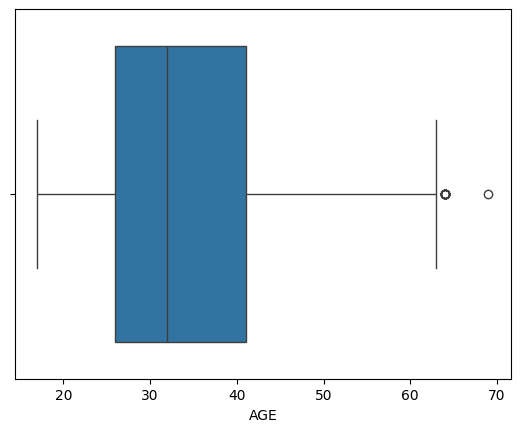

<ipython-input-95-4719d4bcd3de>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_loan_df[col_name], hist=False)


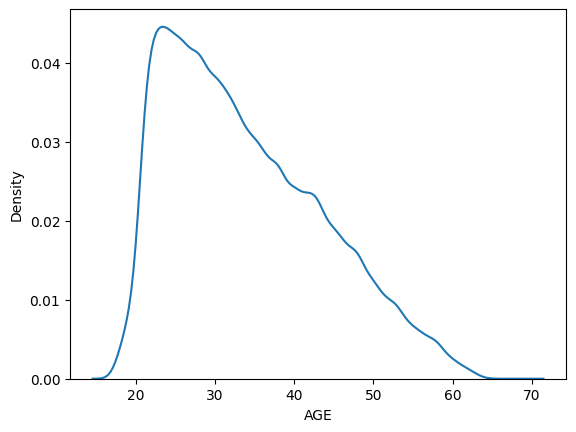

AGE Grouped Summary


                 count       mean       std   min   25%   50%   75%   max
LOAN_DEFAULT                                                             
0             182543.0  34.090713  9.860825  17.0  26.0  32.0  41.0  69.0
1              50611.0  33.225366  9.685441  17.0  25.0  31.0  40.0  64.0


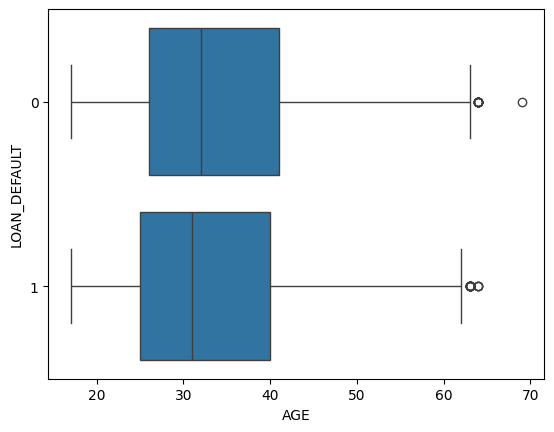

In [97]:
explore_continuous('AGE')

Average age of default is between 33 and 34. The distribution also suggets that the risk of default is between the ages 25 and 40. We would have to look at other features to better understand the Default category, as the Non-Default category has a similar age distribution.

Let's plot the correlation matrics

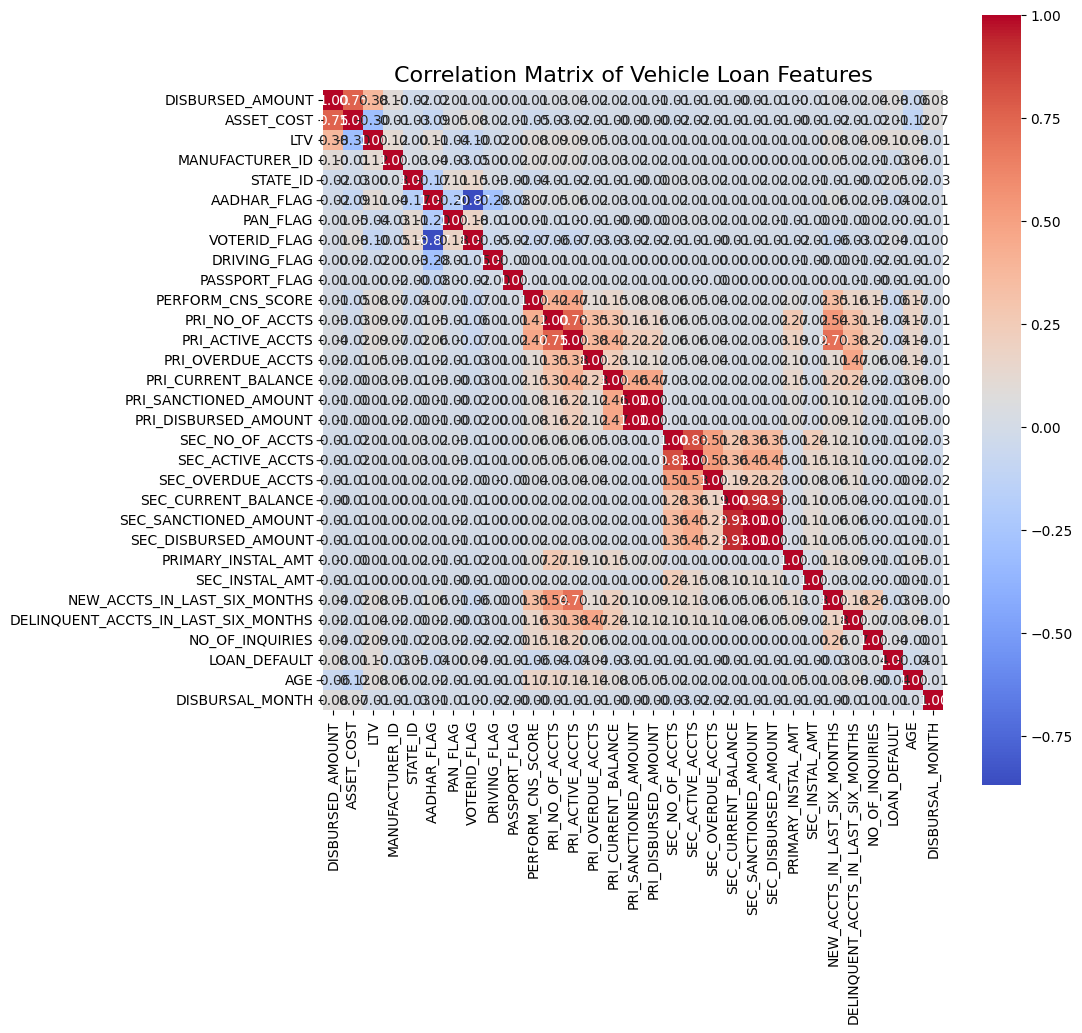

In [98]:
# Get the numeric columns
numeric_cols = vehicle_loan_df.select_dtypes(include=["int", "float"]).columns

# Create a correlation matrix
corr_matrix = vehicle_loan_df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Vehicle Loan Features", fontsize=16)
plt.show()

## Feature Engineering

- Create new features that capture additional information or improve the predictive power of the model.
- This might involve combining existing features, creating ratios or percentages, or extracting categorical features from text

We have looked at some float features that, from reading their description, suggest they should be int64. Let's have a look:

In [99]:
vehicle_loan_df[['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']].sample(n=5)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
475114,0yrs 0mon,0yrs 0mon
459648,0yrs 0mon,0yrs 0mon
441484,0yrs 0mon,0yrs 0mon
485477,0yrs 0mon,0yrs 0mon
640124,0yrs 3mon,0yrs 3mon


The format of these features "Oyrs Omon" will not be as useful for analysis or prediction. Let's convert it to number of months.

In [100]:
def calc_months(str_list):
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

In [101]:
#Convert  'CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE' from '0yrs 0mon'  format to a number in months

def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    vehicle_loan_df[new_col] = vehicle_loan_df[col_name].str.findall('\d+')
    vehicle_loan_df[new_col] = vehicle_loan_df[new_col].map(calc_months)


In [102]:
convert_str_to_months('CREDIT_HISTORY_LENGTH')
convert_str_to_months('AVERAGE_ACCT_AGE')
vehicle_loan_df[['CREDIT_HISTORY_LENGTH_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS']].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
UNIQUEID,,
623127,0,0
457182,8,8
533348,34,34
519922,31,31
500012,0,0


In [103]:
#drop the origal colums
vehicle_loan_df = vehicle_loan_df.drop(['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1)


## Binning

Recall that largest DISBURSED_AMOUNT was `990,572` this is considerably larger than the next largest value which is also an extreme outlier. Let's investigate this further to compare this amout to the LTV and the ASSEST_COST to investigate reasonability.



In [104]:
vehicle_loan_df.loc[vehicle_loan_df['DISBURSED_AMOUNT'].idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG                                                                          0
PERFORM_CNS_SCORE    

he extreme value of 990,572 for the disbursed amount seems reasonable when compared to the asset cost of 1,628,992.

Keeping outliers in the data, if they appear to be legitimate, can be beneficial for several reasons. Outliers may contain valuable information or represent rare but significant cases. Removing them could lead to loss of important insights or biases in the model. In this cae, we keep the outlier.

To prevent this value from skewing the data, we can use binning to create categorical groups from the continuous variable. This will allow us to keep the extreme value in the model without it having an undue influence on the results.

In [105]:
# Create bins based on the disbursed amount
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

# Create labels for the bins
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1000k']

# Bin the disbursed amount
vehicle_loan_df['DISBURSED_AMOUNT_BIN'] = pd.cut(vehicle_loan_df['DISBURSED_AMOUNT'], bins=bins, labels=labels)



In [106]:
vehicle_loan_df['DISBURSAL_DIFFERENCE'] = vehicle_loan_df['ASSET_COST'] - vehicle_loan_df['DISBURSED_AMOUNT']

In [107]:
# Drop the original disbursed amount column
vehicle_loan_df = vehicle_loan_df.drop('DISBURSED_AMOUNT', axis=1)

### Primary and Secondary Account Engineering

The loan data contains 14 columns providing information about any existing loans a customer may have. This data is split according to primary and secondary accounts, a primary account is a loan where the customer is the sole recipient of the disbursal,
a secondary account is one where the customer is a co-applicant or guarantor for the loan

- PRI_NO_OF_ACCTS: count of total loans taken by the customer at the time of disbursement  
- PRI_ACTIVE_ACCTS: count of active loans taken by the customer at the time of disbursement
- PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement    
- PRI_CURRENT_BALANCE: total Principal outstanding amount of the active loans at the time of disbursement        
- PRI_SANCTIONED_AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement  
- PRI_DISBURSED_AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY_INSTAL_AMT: EMI Amount of the primary loan
- SEC_NO_OF_ACCTS: count of secondary total loans taken by the customer at the time of disbursement
- SEC_ACTIVE_ACCTS: count of secondary active loans taken by the customer at the time of disbursement
- SEC_OVERDUE_ACCTS: count of secondary accounts at the time of disbursement    
- SEC_CURRENT_BALANCE: total Principal outstanding amount of the secondary active loans at the time of disbursement
- SEC_SANCTIONED_AMOUNT: total amount that was sanctioned for all the secondary loans at the time of disbursement  
- SEC_DISBURSED_AMOUNT: total amount that was disbursed for all the secondary loans at the time of disbursement
- SEC_INSTAL_AMT: EMI Amount of the secondary loan


If you apply the explore_continuous function on these features, you will see that in the majority of cases the data in these columns is limited

Instead of simply dropping them, we will combine so we can reduce the complexity of our data without losing information. The distinction between primary and seconday is not so relevant for predictions

In [108]:
vehicle_loan_df['TOTAL_ACCTS'] = vehicle_loan_df['PRI_NO_OF_ACCTS'] + vehicle_loan_df['SEC_NO_OF_ACCTS']

In [109]:
vehicle_loan_df['TOTAL_ACTIVE_ACCTS'] = vehicle_loan_df['PRI_ACTIVE_ACCTS'] + vehicle_loan_df['SEC_ACTIVE_ACCTS']
vehicle_loan_df['TOTAL_OVERDUE_ACCTS'] = vehicle_loan_df['PRI_OVERDUE_ACCTS'] + vehicle_loan_df['SEC_OVERDUE_ACCTS']
vehicle_loan_df['TOTAL_CURRENT_BALANCE'] = vehicle_loan_df['PRI_CURRENT_BALANCE'] + vehicle_loan_df['SEC_CURRENT_BALANCE']
vehicle_loan_df['TOTAL_SANCTIONED_AMOUNT'] = vehicle_loan_df['PRI_SANCTIONED_AMOUNT'] + vehicle_loan_df['SEC_SANCTIONED_AMOUNT']
vehicle_loan_df['TOTAL_DISBURSED_AMOUNT'] = vehicle_loan_df['PRI_DISBURSED_AMOUNT'] + vehicle_loan_df['SEC_DISBURSED_AMOUNT']
vehicle_loan_df['TOTAL_INSTAL_AMT'] = vehicle_loan_df['PRIMARY_INSTAL_AMT'] + vehicle_loan_df['SEC_INSTAL_AMT']

In [110]:
#now that we have removed that redundancy, let's drop these features
drop_cols = ['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT', 'SEC_NO_OF_ACCTS']

vehicle_loan_df = vehicle_loan_df.drop(drop_cols, axis=1)

Let's create a column 'OVERDUE_PCT' that stores the percentage of overdue accounts

In [111]:
vehicle_loan_df['OVERDUE_PCT'] = 100 * vehicle_loan_df['TOTAL_OVERDUE_ACCTS'] / vehicle_loan_df['TOTAL_ACTIVE_ACCTS']
vehicle_loan_df['OVERDUE_PCT'].fillna(0, inplace=True)


## Data Preparation:

This is where we prepare our data for model training purposes:
- Standardize or normalize the numerical features to ensure consistent scaling
- Split the dataset into training, and testing datasets.

### Normalise Data

**Min-Max Scaling**
Min-max scaling is employed to bring continuous variables into the same range. This normalization technique is crucial for ensuring that no single feature dominates the learning algorithm due to differences in scale. It typically scales features to a range between 0 and 1. Sklearn provides a convenient implementation of min-max scaling through `MinMaxScaler`.

**Treatment of Outliers***
While outliers are observed in the data, they are retained as they seem to be legitimate. This decision is made because outliers may contain valuable information or represent significant but rare cases. Removing them could result in the loss of important insights or introduce biases into the model. However, it's essential to carefully evaluate outliers in the context of the problem and dataset characteristics.

By following these preprocessing steps, we aim to ensure that our data is appropriately scaled and retains valuable information for building an accurate loan prediction model.

Let's have a look at some of the numerial data on one axis for reference:

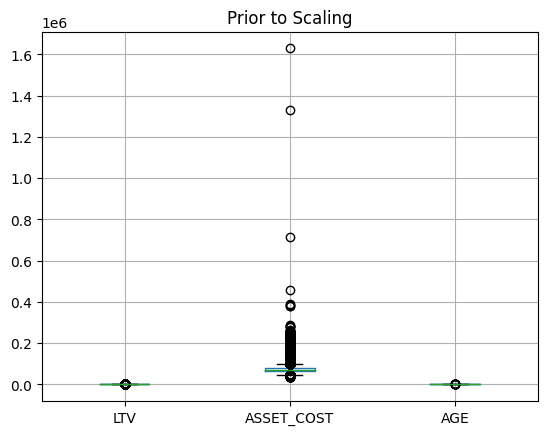

In [112]:
vehicle_loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [113]:
#prepare the data for scaling
numeric_cols = vehicle_loan_df.select_dtypes(include=["int", "float"]).columns
vehicle_loan_df[numeric_cols] = vehicle_loan_df[numeric_cols].replace([np.inf, -np.inf], np.nan)
vehicle_loan_df[numeric_cols].isnull().sum()
vehicle_loan_df[numeric_cols].fillna(0, inplace=True)


<ipython-input-113-ffab08868c8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_loan_df[numeric_cols].fillna(0, inplace=True)


In [114]:
# prompt: We will use min max scaling to bring our continuous variables into the same range Outliers have been observed in the data. However, we will keep them as they appear to be legitimate Sklearn provides an implementation of Min Max scaling, MinMaxScaler
numeric_cols = vehicle_loan_df.select_dtypes(include=["int", "float"]).columns

scaler = MinMaxScaler()
vehicle_loan_df[numeric_cols] = scaler.fit_transform(vehicle_loan_df[numeric_cols])

The boxplots show the distribution of three numerical features: LTV, ASSET_COST, and AGE.

- The LTV feature has the largest range of values, with some outliers extending beyond the upper whisker. This suggests that there is a wide variation in the ratio of loan amount to vehicle cost.

- The ASSET_COST feature also has a wide range of values, but the distribution is more symmetrical. There are a few outliers with high values, but the majority of the data points are clustered around the median.

- The AGE feature has the smallest range of values, and the distribution is roughly symmetrical. The majority of borrowers are between 20 and 40 years old.

Overall, the boxplots show that the three features have different distributions and scales. This is important to consider when building a machine learning model, as features with larger scales can dominate the model if they are not properly scaled.


In [115]:
vehicle_loan_df.head()

,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,DISBURSED_AMOUNT_BIN,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,TOTAL_ACTIVE_ACCTS,TOTAL_OVERDUE_ACCTS,TOTAL_CURRENT_BALANCE,TOTAL_SANCTIONED_AMOUNT,TOTAL_DISBURSED_AMOUNT,TOTAL_INSTAL_AMT,OVERDUE_PCT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,0.013442,0.935860,0.0,Salaried,0.238095,1.0,0.0,0.0,0.0,0.0,...,0-100k,0.006029,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.000000
537409,0.017934,0.743792,0.0,Self employed,0.238095,1.0,0.0,0.0,0.0,0.0,...,0-100k,0.022710,0.002208,0.006944,0.04,0.064978,0.00005,0.00005,0.000078,0.083333
417566,0.015302,0.936801,0.0,Self employed,0.238095,1.0,0.0,0.0,0.0,0.0,...,0-100k,0.006439,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.000000
624493,0.018287,0.923267,0.0,Self employed,0.238095,1.0,0.0,0.0,0.0,0.0,...,0-100k,0.007255,0.006623,0.000000,0.00,0.064710,0.00000,0.00000,0.000001,0.000000
539055,0.014636,0.922208,0.0,Self employed,0.238095,1.0,0.0,0.0,0.0,0.0,...,0-100k,0.006187,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.000000


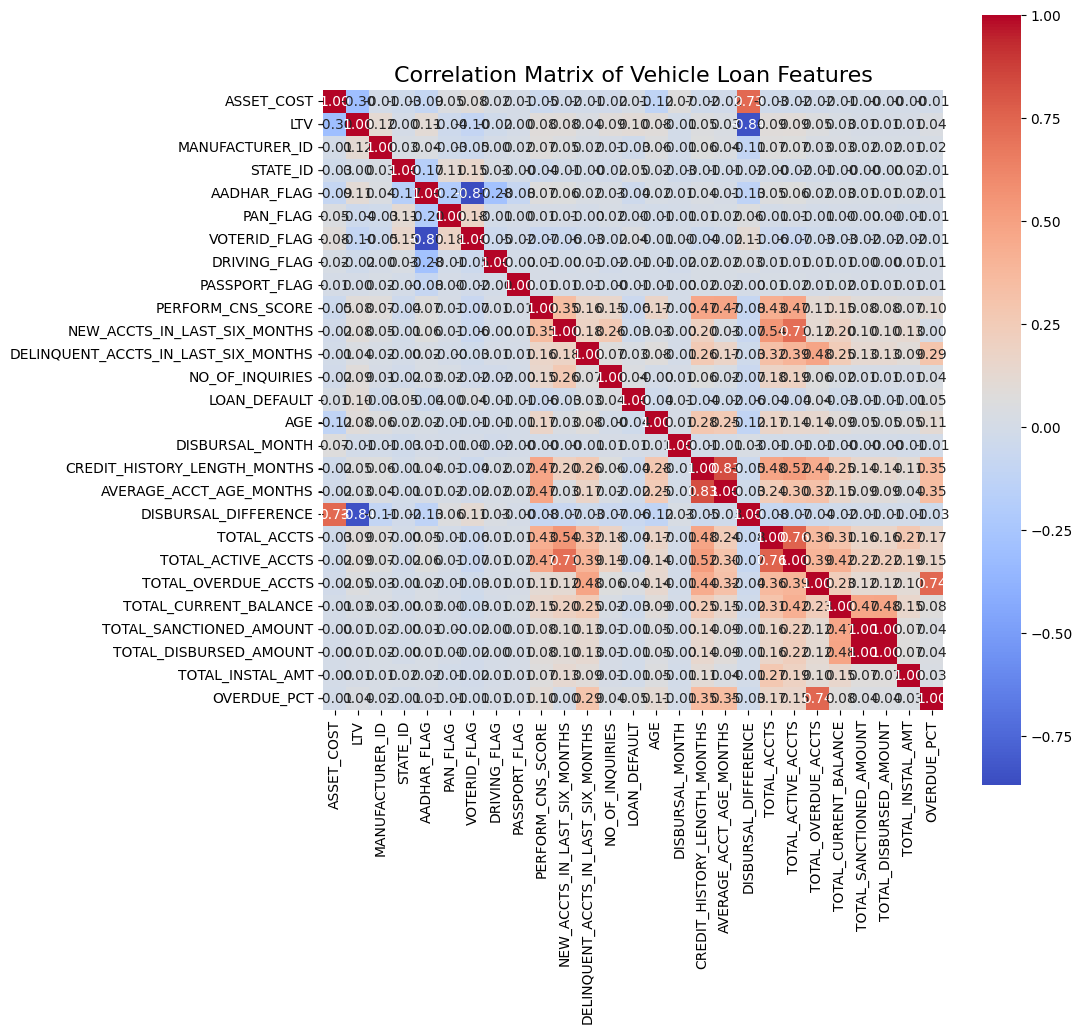

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns
numeric_cols = vehicle_loan_df.select_dtypes(include=["int", "float"]).columns

# Create a correlation matrix
corr_matrix = vehicle_loan_df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Vehicle Loan Features", fontsize=16)
plt.show()


The correlation matrix shows the relationship between different features in the dataset. The values range from -1 to 1, where:

* -1 indicates a perfect negative correlation (as one feature increases, the other decreases)
* 0 indicates no correlation
* 1 indicates a perfect positive correlation (as one feature increases, the other increases)

In the context of the vehicle loan dataset, the correlation matrix shows the following insights:

* There is a strong positive correlation between `LTV` and `ASSET_COST`, which means that vehicles with higher cost tend to have higher loan amounts.
* There is a moderate positive correlation between `AGE` and `DISBURSAL_DIFFERENCE`, which means that older borrowers tend to have larger differences between the asset cost and the disbursed amount.
* There is a weak positive correlation between `OVERDUE_PCT` and `DISBURSED_AMOUNT_BIN`, which means that borrowers with higher overdue percentages tend to have larger disbursed loan amounts.
* There is a weak negative correlation between `AGE` and `LOAN_DEFAULT`, which means that older borrowers are slightly less likely to default on their loans.

These insights can be used to build a more accurate loan prediction model by identifying features that are most relevant to predicting loan default.


## Train/Test Split

As part of the data preparation process, we split our data so that we have a data set for model training purposes and another one for testing the accuracy of our model.

Let's have one more look at the type of data we are dealing with.


In [117]:
vehicle_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ASSET_COST                           233154 non-null  float64 
 1   LTV                                  233154 non-null  float64 
 2   MANUFACTURER_ID                      233154 non-null  float64 
 3   EMPLOYMENT_TYPE                      233154 non-null  object  
 4   STATE_ID                             233154 non-null  float64 
 5   AADHAR_FLAG                          233154 non-null  float64 
 6   PAN_FLAG                             233154 non-null  float64 
 7   VOTERID_FLAG                         233154 non-null  float64 
 8   DRIVING_FLAG                         233154 non-null  float64 
 9   PASSPORT_FLAG                        233154 non-null  float64 
 10  PERFORM_CNS_SCORE                    233154 non-null  float64 


We want the classifier to recognise categorical variables where appropriate

Lets use the dtypes property to look at the variable types of our categorical feilds

In [118]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
vehicle_loan_df[category_cols].dtypes

MANUFACTURER_ID                  float64
STATE_ID                         float64
DISBURSAL_MONTH                  float64
PERFORM_CNS_SCORE_DESCRIPTION     object
EMPLOYMENT_TYPE                   object
dtype: object


Some of the columns are `object`. We there need to decide wether to:

- Drop Object Columns: If the object columns do not contain valuable information for our loans default predictive modeling task, we might choose to drop them altogether.

- Encode Categorical Variables: We can encode our categorical columns with the `category` data type


`EMPLOYMENT_TYPE` contain valuable information for our loans default predictive modeling. If we recall, Self employed individuals demonstrated a slightly higher rate of default. This suggests a relationship between `EMPLOYMENT_TYPE` and our target variable `LOAN_DEFAULT`.

For `EMPLOYMET_TYPE`and other categorical data, we will encode as follows:



In [119]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'EMPLOYMENT_TYPE']
vehicle_loan_df[category_cols] = vehicle_loan_df[category_cols].astype('category')
vehicle_loan_df[category_cols].dtypes


MANUFACTURER_ID    category
STATE_ID           category
DISBURSAL_MONTH    category
EMPLOYMENT_TYPE    category
dtype: object

**LOAN_DEFAULT**

The LOAN_DEFAULT column is formated as a continuous variable and not a categorical. Let us change that.

In [120]:
#Make LOAN_DEFAULT Col whole numbers (without decimals) and change format to categorical

#vehicle_loan_df['LOAN_DEFAULT'] = vehicle_loan_df['LOAN_DEFAULT'].round(0).astype('int64')
#vehicle_loan_df['LOAN_DEFAULT'] = vehicle_loan_df['LOAN_DEFAULT'].astype('category')


Some of our categorical data contains strings. Before we train our model, we going to have to dummy encode our data. This is because, while the are some algorithms that can handle string data,
most machine learning algorithms require numeric input data.

**Dummy Encoding**

We do it as follows:

In [121]:
vehicle_loan_dumm = pd.get_dummies(vehicle_loan_df, prefix_sep='_', drop_first=True)

In [122]:
vehicle_loan_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 96 columns):
 #   Column                                                                                 Non-Null Count   Dtype  
---  ------                                                                                 --------------   -----  
 0   ASSET_COST                                                                             233154 non-null  float64
 1   LTV                                                                                    233154 non-null  float64
 2   AADHAR_FLAG                                                                            233154 non-null  float64
 3   PAN_FLAG                                                                               233154 non-null  float64
 4   VOTERID_FLAG                                                                           233154 non-null  float64
 5   DRIVING_FLAG                                                

In [123]:
#Split Vehicle_loan_df into train/test sets

X = vehicle_loan_dumm.drop('LOAN_DEFAULT', axis=1)
y = vehicle_loan_dumm['LOAN_DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
imputer = SimpleImputer(strategy="mean")
X_train= imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
y_train = y_train.to_numpy()

In [124]:
vehicle_loan_dumm['LOAN_DEFAULT']

UNIQUEID
420825    0.0
537409    1.0
417566    0.0
624493    1.0
539055    1.0
         ... 
626432    0.0
606141    0.0
613658    0.0
548084    0.0
630213    0.0
Name: LOAN_DEFAULT, Length: 233154, dtype: float64

## Train and Validate

**Model Selection:**
- Experiment with different machine learning algorithms such as logistic regression, decision trees, and random forests.
- Evaluate the performance of each model using metrics such as accuracy, precision, and recall.

**Model Training and Evaluation:**
- Train the best performing model on the training set.
- Evaluate the model's performance on the validation set to fine-tune its parameters.
- Assess the model'sgeneralizability on the test set to ensure it does not overfit the training data.

1. **Logistic_regression**

The logistic regression model is one of the most commonly used classifier that works well for binary classification task, so let's see how it performs.

In [125]:
# fit a Logistic Regression classifier


logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     36509
         1.0       0.43      0.01      0.01     10122

    accuracy                           0.78     46631
   macro avg       0.60      0.50      0.45     46631
weighted avg       0.71      0.78      0.69     46631

AUC: 0.6441891652129701


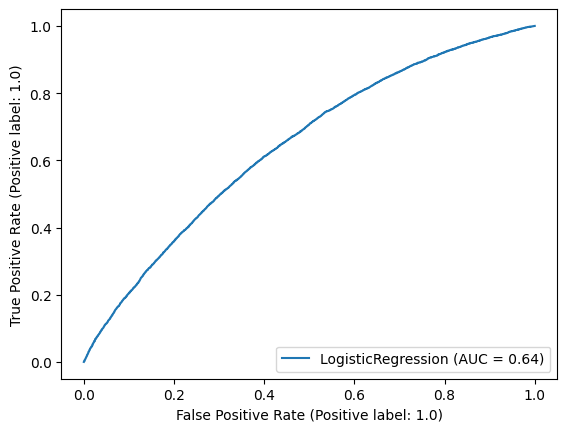

In [126]:
# Evaluate the performance of logistc regression

# Evaluate the model on the test set
y_pred = logistic_regression.predict(X_test)
y_score = logistic_regression.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC curve and AUC
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
print("AUC:", roc_auc_score(y_test, y_score))


Precision: Precision measures the proportion of correctly predicted positive cases (true positives) out of all instances predicted as positive (true positives + false positives). In this case, for class 0 (represented as 0.0), the precision is 0.78, indicating that 78% of the instances predicted as class 0 were correctly classified.

Recall (Sensitivity): Recall measures the proportion of correctly predicted positive cases (true positives) out of all actual positive instances (true positives + false negatives). In this case, for class 0, the recall is 1.00, meaning that 100% of the actual class 0 instances were correctly identified by the model.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is especially useful when there is an imbalance between the number of positive and negative instances. For class 0, the F1-score is 0.88, which indicates a good balance between precision and recall for this class.

Support: Support refers to the number of actual occurrences of each class in the dataset. For class 0, there are 36,509 instances.

Accuracy: Accuracy measures the overall correctness of the model across all classes. It is the proportion of correctly predicted instances (true positives + true negatives) out of all instances. In this case, the accuracy is 0.78, indicating that 78% of all instances were correctly classified.

Macro Average: The macro average calculates the unweighted mean of precision, recall, and F1-score across all classes. It gives equal weight to each class, regardless of class imbalance. For macro average precision, recall, and F1-score, we have 0.60, 0.50, and 0.45, respectively.

Weighted Average: The weighted average calculates the average of precision, recall, and F1-score, weighted by the number of instances in each class. It is useful when there is class imbalance. For weighted average precision, recall, and F1-score, we have 0.71, 0.78, and 0.69, respectively.

**The ROC Curve**

The curve plots the True Positive ratesRates (TPR) against False Positive Rates (FPR) at various classification thresholds. Ideally, the curve hugs the top-left corner, minimizing FPR while maximizing TPR.

The AUC (Area Under Curve) summarises the curve's performance. A number to 1 indicates better performance.

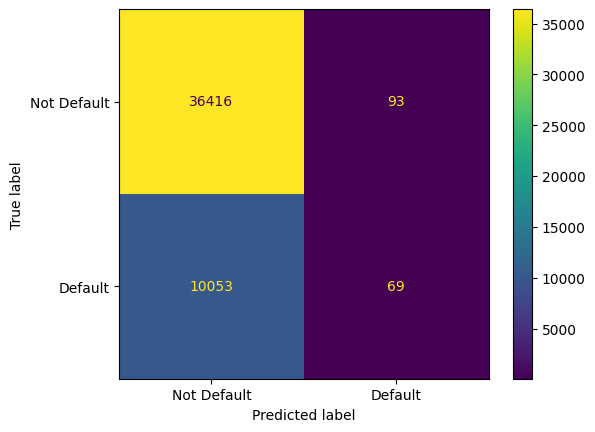

In [127]:
# Plot the confusion matrics

ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test, display_labels=['Not Default', 'Default'], values_format='d')


Comparing the Confusion Matrix with the one from the Decision Trees classifier, it looks like there are some inconsistencies. These will be investigated.

2. **Decision Trees**

Another most commonly used classifier is Decision Trees. Decision trees are intuitive models that partition the feature space into regions and make predictions based on the majority class within each region. They can capture non-linear relationships and interactions between features.

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79     36509
         1.0       0.26      0.29      0.27     10122

    accuracy                           0.67     46631
   macro avg       0.53      0.53      0.53     46631
weighted avg       0.68      0.67      0.68     46631

AUC: 0.5328683330778021


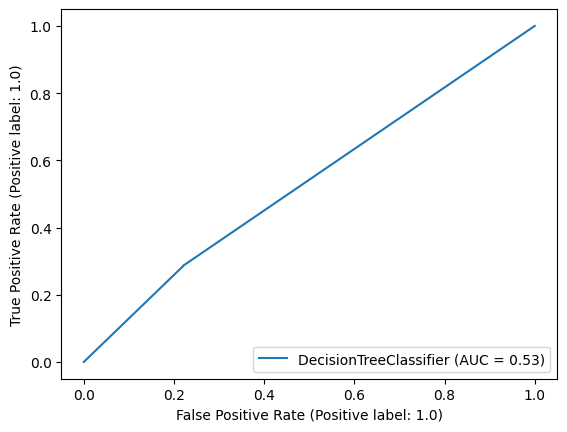

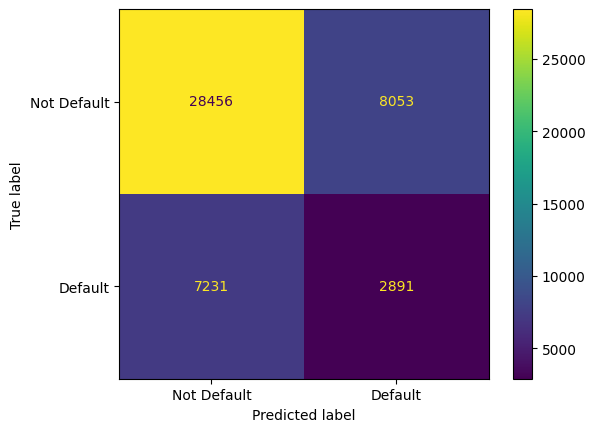

In [128]:
#Let's train decision trees

# Fit a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluate the performance of decision tree

# Evaluate the model on the test set
y_pred = decision_tree.predict(X_test)
y_score = decision_tree.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC curve and AUC
RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
print("AUC:", roc_auc_score(y_test, y_score))

# Plot the confusion matrics
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, display_labels=['Not Default', 'Default'], values_format='d')


3. **Other Models**

Other models we can apply are:

Neural Networks, Random Forests to the data for training and prediction.

In [133]:
#Train with Neural networks and make predictions as well as evaluate the performance

# Neural Networks
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))


Epoch 1/10
5829/5829 [==============================] - 23s 4ms/step - loss: 0.5142 - accuracy: 0.7823
Epoch 2/10
5829/5829 [==============================] - 17s 3ms/step - loss: 0.5060 - accuracy: 0.7828
Epoch 3/10
5829/5829 [==============================] - 16s 3ms/step - loss: 0.5036 - accuracy: 0.7828
Epoch 4/10
5829/5829 [==============================] - 17s 3ms/step - loss: 0.5026 - accuracy: 0.7827
Epoch 5/10
5829/5829 [==============================] - 19s 3ms/step - loss: 0.5019 - accuracy: 0.7828
Epoch 6/10
5829/5829 [==============================] - 16s 3ms/step - loss: 0.5011 - accuracy: 0.7829
Epoch 7/10
5829/5829 [==============================] - 17s 3ms/step - loss: 0.5006 - accuracy: 0.7830
Epoch 8/10
5829/5829 [==============================] - 17s 3ms/step - loss: 0.5003 - accuracy: 0.7826
Epoch 9/10
5829/5829 [==============================] - 18s 3ms/step - loss: 0.4996 - accuracy: 0.7830
Epoch 10/10
1458/1458 [==============================] - 2s 2ms/step
    

This project is work in progress